In [1]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction
import scipy.cluster.hierarchy as sch
from matplotlib import pyplot as plt

In [2]:
df = pd.read_excel('Explanations similarity.xlsx', index_col=None) 
df

,Explanation - Molny,Explanation - Poli
0,Completamente diverse,Completamente diverse
1,Differenza di parole piene che contribuiscono ...,Pressochè identiche
2,Completamente diverse,Parlano entrambe di alberi sotto al sole
3,Completamente diverse,Frasi contigue prese entrambe dallo stesso pez...
4,Hanno in comune come argomento principale il p...,Parlano entrambe di prestiti di denaro
...,...,...
85,Completamente diverse,Completamente diverse
86,Lieve similarità dovuta al fatto che vi è un i...,Parlano entrambe di uomini che sono o sono sta...
87,Medesimo senso ovvero quello di una persona ch...,Pressochè identiche
88,Completamente diverse,Completamente diverse


In [3]:
sent1 = set(df['Explanation - Poli']) # con 'set' rimuovo i duplicati
sent2 = set(df['Explanation - Poli']) # stesse frasi

In [4]:
bleu_scores = []

for s1 in sent1:
    bleu_scores.append([1 - sentence_bleu([s1], s2, weights = [1],) for s2 in sent2]) 
    ### con 1 - BLEU calcolo la distanza tra le frasi
    
df1 = pd.DataFrame(bleu_scores, index=list(sent1), columns=list(sent2))
df1

,Entrambe descrizioni di uomini,Stessa descrizione della situazione vista da due punti di vista differenti,Descrizione di una reazione facciale,Stessa azione effettuata però da persone diverse,Descrizioni di boschi in stagioni diverse dell'anno,Stesse emozioni,Stessi personaggi e emozioni coinvolte,Scene di un duello con pistole,"Struttura della frase simili, comparazioni tra un io che parla con un gruppo diverso",Descrizioni della stessa scena,...,Descrizioni diverse della stessa scena,Indicazione temporale tramite l'utilizzo del sole,Descrizione estetica della stessa persona,Descrizione fisica di due soldati,Stessa valuta,Pressochè identiche,"Stessi personaggi coinvolti, la zia è causa di uno o più sentimenti",Parlano entrambe di prestiti di denaro,Descrizioni di alberi,Descrizioni fisiche di due persone
Entrambe descrizioni di uomini,0.000000,0.648649,0.361111,0.583333,0.490196,0.705696,0.421053,0.400000,0.666667,0.400000,...,0.447368,0.469388,0.512195,0.303030,0.875180,0.646008,0.626866,0.394737,0.410603,0.323529
Stessa descrizione della situazione vista da due punti di vista differenti,0.800066,0.000000,0.681001,0.466704,0.475409,0.981727,0.673465,0.792376,0.345238,0.784686,...,0.632648,0.522152,0.574669,0.728812,0.990834,0.959243,0.273986,0.663261,0.927480,0.718844
Descrizione di una reazione facciale,0.372306,0.554054,0.000000,0.458333,0.431373,0.819162,0.342105,0.426888,0.607143,0.345015,...,0.263158,0.387755,0.292683,0.252918,0.895099,0.720353,0.552239,0.315789,0.533770,0.223516
Stessa azione effettuata però da persone diverse,0.634126,0.405405,0.482505,0.000000,0.431373,0.896584,0.474102,0.597538,0.523810,0.579244,...,0.413421,0.346939,0.321449,0.538374,0.937485,0.851297,0.447761,0.413421,0.815698,0.493398
Descrizioni di boschi in stagioni diverse dell'anno,0.569626,0.432432,0.468945,0.432438,0.000000,0.921378,0.420566,0.586179,0.488095,0.536520,...,0.383184,0.353466,0.407549,0.455548,0.962776,0.843713,0.343284,0.457949,0.760349,0.464826
Stesse emozioni,0.600000,0.810811,0.694444,0.708333,0.745098,0.000000,0.605263,0.600000,0.821429,0.600000,...,0.684211,0.734694,0.682927,0.606061,0.604275,0.421053,0.776119,0.684211,0.571429,0.647059
Stessi personaggi e emozioni coinvolte,0.438319,0.567568,0.343084,0.458333,0.392157,0.784185,0.000000,0.438319,0.571429,0.438319,...,0.315789,0.387755,0.341463,0.374978,0.887572,0.748293,0.447761,0.342105,0.639705,0.346316
Scene di un duello con pistole,0.400000,0.635135,0.416667,0.541667,0.509804,0.705696,0.421053,0.000000,0.642857,0.366667,...,0.447368,0.469388,0.463415,0.393939,0.854377,0.616508,0.582090,0.421053,0.627749,0.382353
"Struttura della frase simili, comparazioni tra un io che parla con un gruppo diverso",0.845721,0.350704,0.758369,0.606361,0.558547,0.989948,0.717646,0.834701,0.000000,0.851231,...,0.749019,0.580393,0.709454,0.799707,0.995753,0.972482,0.316745,0.725489,0.954955,0.783727
Descrizioni della stessa scena,0.400000,0.621622,0.333333,0.520833,0.450980,0.705696,0.421053,0.366667,0.678571,0.000000,...,0.210526,0.510204,0.268293,0.272727,0.812770,0.557509,0.567164,0.447368,0.472645,0.352941


In [5]:
df1.values # matrice di distanza

array([[0.        , 0.64864865, 0.36111111, ..., 0.39473684, 0.41060276,
        0.32352941],
       [0.80006591, 0.        , 0.68100088, ..., 0.66326096, 0.92748001,
        0.71884352],
       [0.37230642, 0.55405405, 0.        , ..., 0.31578947, 0.53376985,
        0.22351623],
       ...,
       [0.41278827, 0.55405405, 0.31680705, ..., 0.        , 0.63970528,
        0.42475839],
       [0.36666667, 0.74324324, 0.44444444, ..., 0.55263158, 0.        ,
        0.47058824],
       [0.32903379, 0.58108108, 0.22222222, ..., 0.42105263, 0.53846542,
        0.        ]])

In [6]:
## https://stackoverflow.com/questions/35873273/display-cluster-labels-for-a-scipy-dendrogram
labelList = df1.index
Z = sch.linkage(df1.values, 'complete')
R = sch.dendrogram(Z,no_plot=True)
labelDict = {leaf: labelList[leaf] for leaf in R["leaves"]} #salva le frasi/label in un dizionario per stamparle dopo

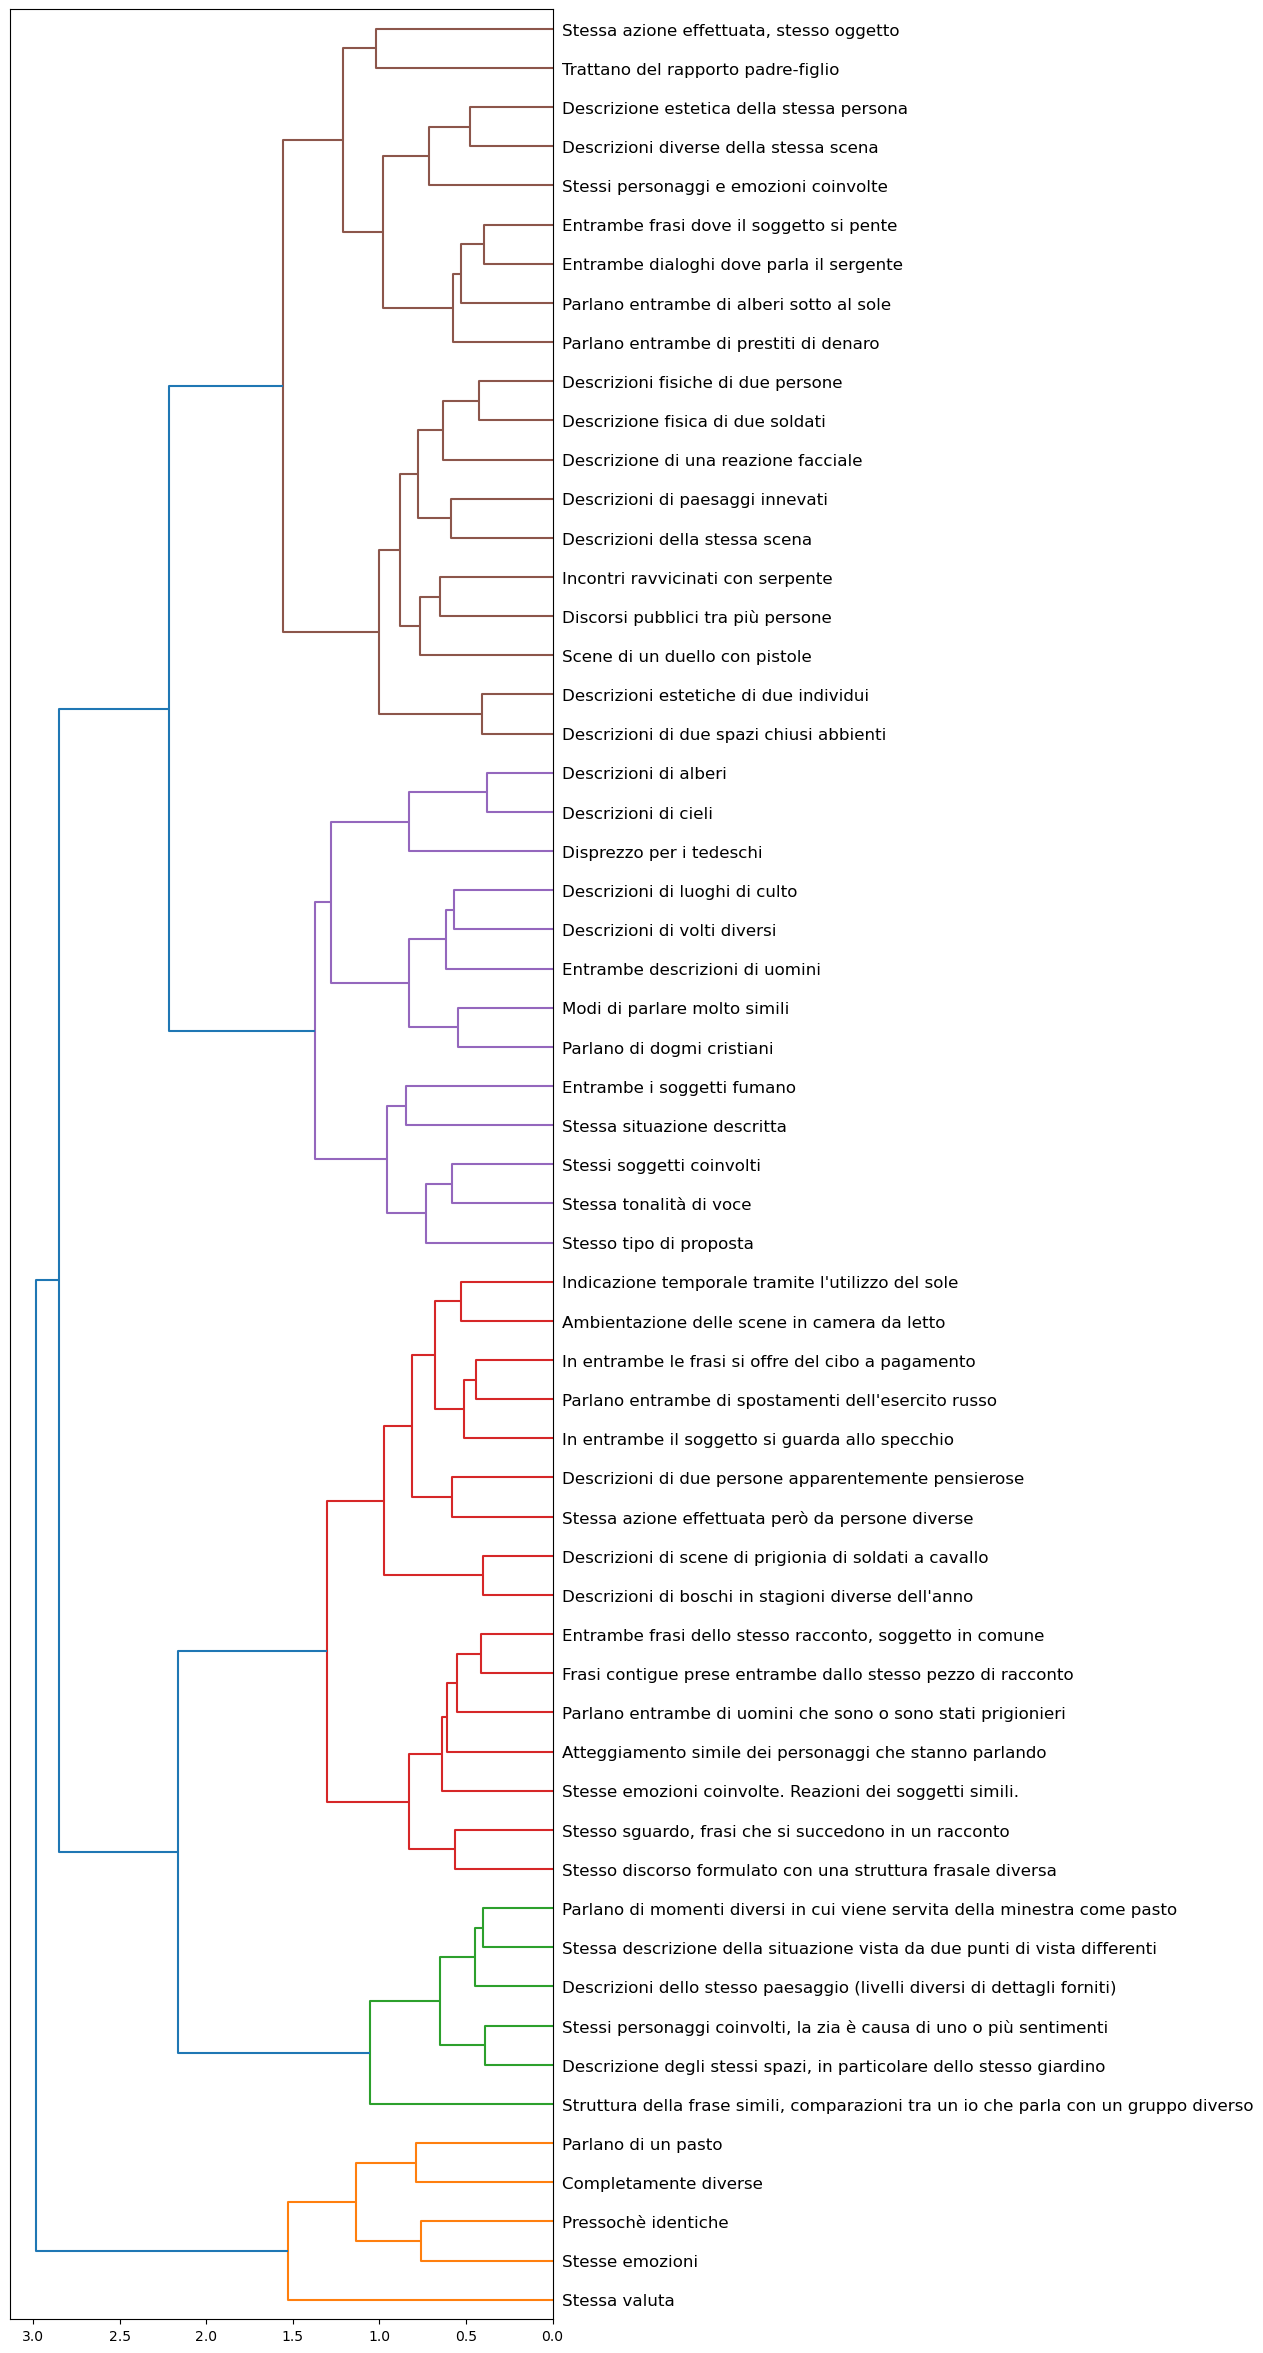

In [7]:
plt.figure(figsize=(7,30))
sch.dendrogram(Z,leaf_label_func=lambda x:labelDict[x], leaf_font_size=12, orientation= 'left')
plt.show()